#Preparasi

In [ ]:
# MENGUNDUH DATASET
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-09 11:42:43--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.54MB/s    in 3m 57s  

2021-05-09 11:46:41 (1.30 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os                                                                       # IMPOR MODUL OS UNTUK MENGAKSES FILE
import zipfile                                                                  # IMPOR MODUL ZIPFILE UNTUK MENGEKSTRAKSI FILE

local_zip = '/tmp/rockpaperscissors.zip'                                        # FILE YANG AKAN DIEKSTRAK
zip_ref = zipfile.ZipFile(local_zip, 'r')                                       # MENGEKSTRAK FILE
zip_ref.extractall('/tmp/')                                                     # DIRECTORY HASIL EKSTRAKSI
zip_ref.close()                                                                 # MENGHENTIKAN FUNGSI

In [ ]:
dir_rock = os.path.join('/tmp/rockpaperscissors/rock')                          # DEFINISIKAN DIREKTORI ROCK
dir_paper = os.path.join('/tmp/rockpaperscissors/paper')                        # DEFINISIKAN DIREKTORI PAPER
dir_scissors = os.path.join('/tmp/rockpaperscissors/scissors')                  # DEFINISIKAN DIREKTORI SCISSORS

print('Training Rock :', len(os.listdir(dir_rock)))                             # JUMLAH DATASET BERLABEL ROCK
print('Training Paper :', len(os.listdir(dir_paper)))                           # JUMLAH DATASET BERLABEL PAPER
print('Training Scissors :', len(os.listdir(dir_scissors)))                     # JUMLAH DATASET BERLABEL SCISSORS

rock_name = os.listdir(dir_rock)                                                # MENDATA DATASET BERLABEL ROCK
print('Rock File Names : ', rock_name[:3])                                      # MENAMPILKAN NAMA 3 FILE PERTAMA BERLABEL ROCK

paper_name = os.listdir(dir_paper)                                              # MENDATA DATASET BERLABEL PAPER
print('Paper File Names : ', paper_name[:3])                                    # MENAMPILKAN NAMA 3 FILE PERTAMA BERLABEL PAPER

scissors_name = os.listdir(dir_scissors)                                        # MENDATA DATASET BERLABEL SCISSORS
print('Scissors File Names : ', scissors_name[:3])                              # MENAMPILKAN NAMA 3 FILE PERTAMA BERLABEL SCISSORS

Training Rock : 726
Training Paper : 712
Training Scissors : 750
Rock File Names :  ['2Pt5UNQkMzXLtbEp.png', '6ZWuYAkiYnDTDa2N.png', '82wZr9Bpl9vfsoG1.png']
Paper File Names :  ['kz9TBAHLFXGnHCiF.png', 'm4BUXxtLrhnsSUJ2.png', 'Y8kfG3f6KJa1YJPA.png']
Scissors File Names :  ['Mwmjta6k9iqQKKd7.png', 'i5CZnAPMNTZtM13A.png', 'tZYSEIgQN7PZ31tk.png']


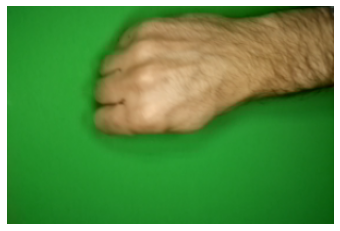

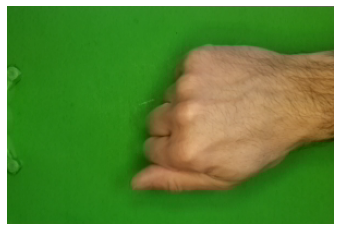

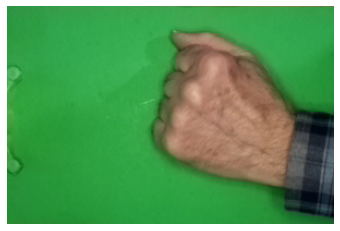

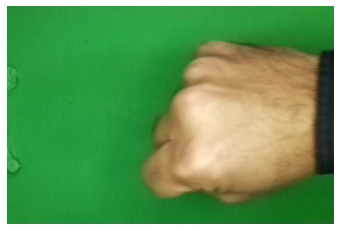

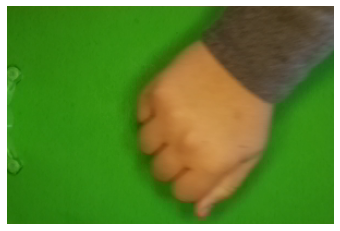

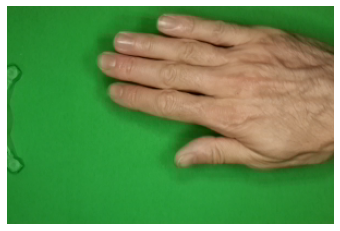

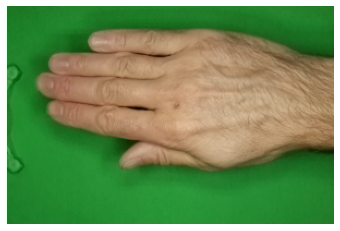

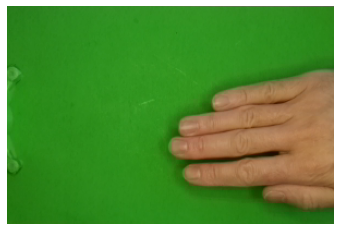

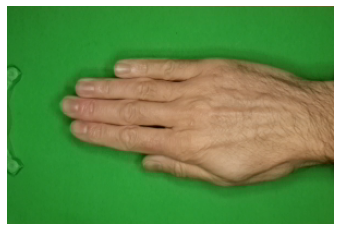

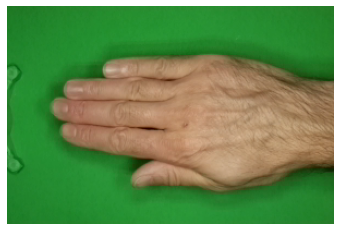

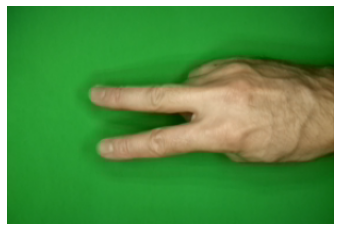

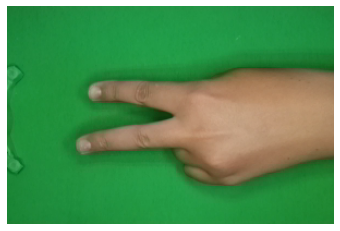

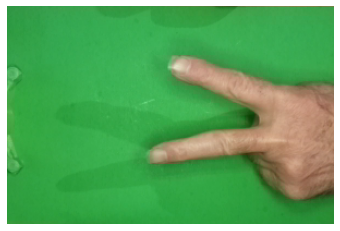

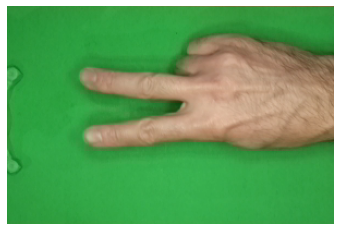

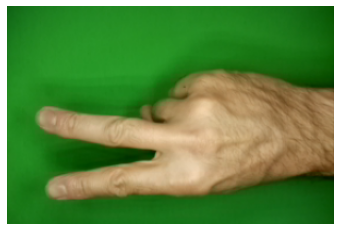

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt                                                 # IMPOR MODUL MATPLOTLIB
import matplotlib.image as mpimg                                                # IMPOR MODUL MATPLOTLIB

rows = 5
cols = 3
index = 5                                                                       # POSISI INDEX ITERASI GAMBAR
pic_rock = [os.path.join(dir_rock, name)                                        # MENAMPILKAN GAMBAR ROCK
                for name in rock_name[index-5:index]]
pic_paper = [os.path.join(dir_paper, name)                                      # MENAMPILKAN GAMBAR PAPER
                for name in paper_name[index-5:index]]
pic_scissors = [os.path.join(dir_scissors, name)                                # MENAMPILKAN GAMBAR SCISSORS
                for name in scissors_name[index-5:index]]

for i, img_path in enumerate(pic_rock + pic_paper + pic_scissors):              # PLOT GAMBAR
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

#Augmentasi Data

In [ ]:
import tensorflow as tf                                                         #IMPOR MODUL TENSORFLOW
from tensorflow.keras.optimizers import RMSprop                                 #IMPOR RMSPROP UNTUK OPTIMIZER
from tensorflow.keras.preprocessing.image import ImageDataGenerator             #IMPOR IMAGEDATAGENERATOR UNTUK GAMBAR

In [ ]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images/'                              # FOLDER BASIS
train_datagen = ImageDataGenerator(                                             
      rescale=1./255,                                                           # NORMALISASI UKURAN
	    rotation_range=40,                                                        # ROTASI
      width_shift_range=0.2,                                                    # AUGMENTASI LEBAR
      height_shift_range=0.2,                                                   # AUGMENTASI TINGGI
      shear_range=0.2,                                                          # AUGMENTASI UKURAN
      zoom_range=0.2,                                                           # AUGMENTASI ZOOM
      horizontal_flip=True,                                                     # PENCERMINAN HORIZONTAL
      vertical_flip=True,                                                       # PENCERMINAN VERTICAL
      fill_mode='nearest',                                                      # MENGISI SISA PIXEL
      validation_split=0.4)                                                     # SPLIT VALIDATION 40%, TRAINING 60%
validation_datagen = ImageDataGenerator(
      rescale=1./255,                                                           # NORMALISASI UKURAN
      validation_split=0.4                                                      # SPLIT VALIDATION 40%, TRAINING 60%
)

In [ ]:
train_generator = train_datagen.flow_from_directory(                            # GENERATOR UNTUK TRAINING
	base_dir,                                                                     # FOLDER BASIS
	target_size=(150,150),                                                        # RESOLUSI GAMBAR
	class_mode='categorical',                                                     # MULTIVARIABEL
  batch_size=20,                                                                # UKURAN BATCH
  shuffle = True,                                                               # SHUFFLE DATA
  subset = 'training'                                                           # TRAINING
)

validation_generator = validation_datagen.flow_from_directory(                  # GENERATOR UNTUK VALIDATION
	base_dir,                                                                     # FOLDER BASIS
	target_size=(150,150),                                                        # RESOLUSI GAMBAR
	class_mode='categorical',                                                     # MULTIVARIABEL
  batch_size=20,                                                                # UKURAN BATCH
  shuffle = True,                                                               # SHUFFLE DATA
  subset = 'validation'                                                         # VALIDATION
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


#Model

In [ ]:
model = tf.keras.models.Sequential([
    # CONVOLUTION PERTAMA
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # CONVOLUTION KEDUA
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # CONVOLUTION KETIGA
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # CONVOLUTION KEEMPAT
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # FLATTEN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # HIDDEN LAYERS
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# BENTUK MODEL
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       7

In [ ]:
# COMPILING MODEL
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# FUNGSI CALLBACK BERHENTI SAAT ACCURACY DI ATAS 0.98
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.98):
      print("\nReached 98.0% accuracy.")
      self.model.stop_training = True

In [ ]:
# TRAINING DATA
callbacks = myCallback()
history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch=60,
                    validation_data = validation_generator,
                    validation_steps=40,
                    verbose = 2,
                    callbacks=[callbacks])

Epoch 1/100
60/60 - 44s - loss: 1.0976 - accuracy: 0.3945 - val_loss: 1.2773 - val_accuracy: 0.3275
Epoch 2/100
60/60 - 42s - loss: 1.0392 - accuracy: 0.4707 - val_loss: 0.7422 - val_accuracy: 0.7200
Epoch 3/100
60/60 - 42s - loss: 0.8029 - accuracy: 0.6608 - val_loss: 0.5347 - val_accuracy: 0.8813
Epoch 4/100
60/60 - 42s - loss: 0.5936 - accuracy: 0.7797 - val_loss: 0.1481 - val_accuracy: 0.9775
Epoch 5/100
60/60 - 42s - loss: 0.3981 - accuracy: 0.8626 - val_loss: 0.2301 - val_accuracy: 0.9225
Epoch 6/100
60/60 - 42s - loss: 0.3356 - accuracy: 0.8800 - val_loss: 0.1570 - val_accuracy: 0.9588
Epoch 7/100
60/60 - 42s - loss: 0.3605 - accuracy: 0.8802 - val_loss: 0.1816 - val_accuracy: 0.9413
Epoch 8/100
60/60 - 42s - loss: 0.2295 - accuracy: 0.9229 - val_loss: 0.1931 - val_accuracy: 0.9375
Epoch 9/100
60/60 - 42s - loss: 0.2475 - accuracy: 0.9204 - val_loss: 0.4667 - val_accuracy: 0.8425
Epoch 10/100
60/60 - 42s - loss: 0.2498 - accuracy: 0.9146 - val_loss: 0.0777 - val_accuracy: 0.9800

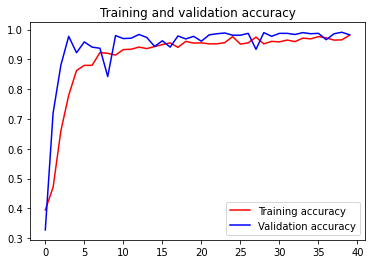

<Figure size 432x288 with 0 Axes>

In [ ]:
# PLOT ACCURACY
%matplotlib inline
import matplotlib.pyplot as plt
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Saving Gambar.jpg to Gambar (1).jpg
Gambar.jpg
This is Rock


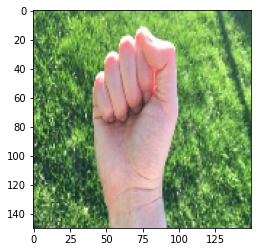

In [ ]:
# UJI COBA GAMBAR
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('This is Paper')
  elif classes[0][1]==1:
    print('This is Rock')
  elif classes[0][2]==1:
    print('This is Scissor')
  else:
    print('Could not detect')